In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("excel-file.xlsx")

In [4]:
df.head()



,month,consumption before,consumption after,price_before,price_after,generation,bills-before,expected bills after,profit-generation,bill-after
0,october,320,273,1.51,2.90,459,483.20,791.70,1331.10,539.40
1,november,290,302,1.51,4.77,384,437.90,1440.54,1831.68,391.14
2,december,330,340,1.51,5.26,229,498.30,1788.40,1204.54,-583.86
3,january,1004,975,1.51,4.02,967,1516.04,3919.50,3887.34,-32.16
4,february,140,125,1.51,3.42,105,211.40,427.50,359.10,-68.40


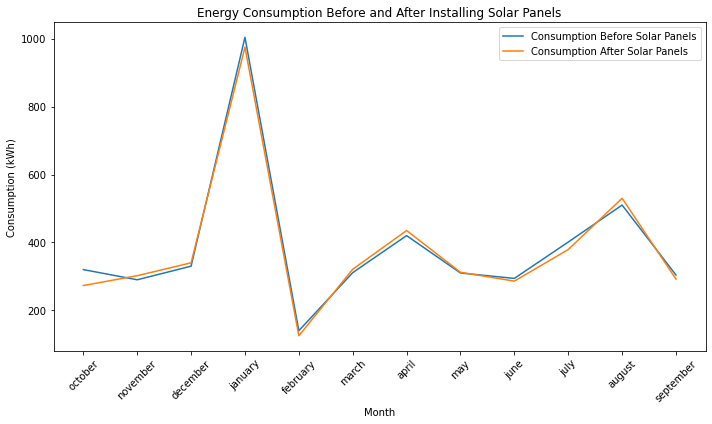

In [5]:
# Plotting consumption before and after having solar panels
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='consumption before', label='Consumption Before Solar Panels')
sns.lineplot(data=df, x='month', y='consumption after', label='Consumption After Solar Panels')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.title('Energy Consumption Before and After Installing Solar Panels')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

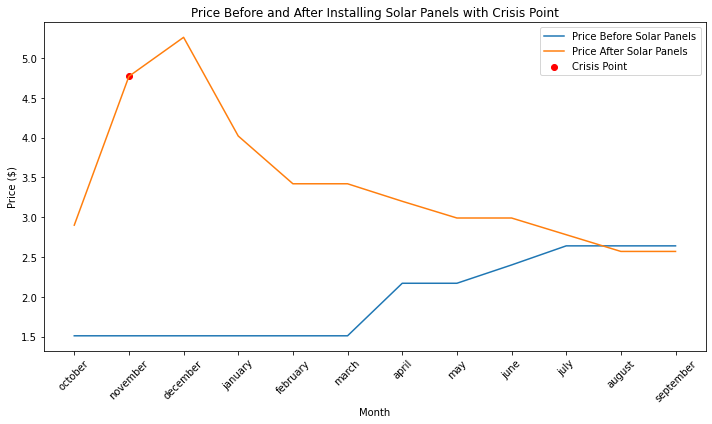

In [6]:
# Plotting price before and after having solar panels
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='price_before', label='Price Before Solar Panels')
sns.lineplot(data=df, x='month', y='price_after', label='Price After Solar Panels')

# Marking the crisis point on the price after
crisis_month = 'november'  # Update with the actual month of the crisis
crisis_price = df.loc[df['month'] == crisis_month, 'price_after'].values[0]
plt.scatter(crisis_month, crisis_price, color='red', label='Crisis Point')

plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.title('Price Before and After Installing Solar Panels with Crisis Point')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


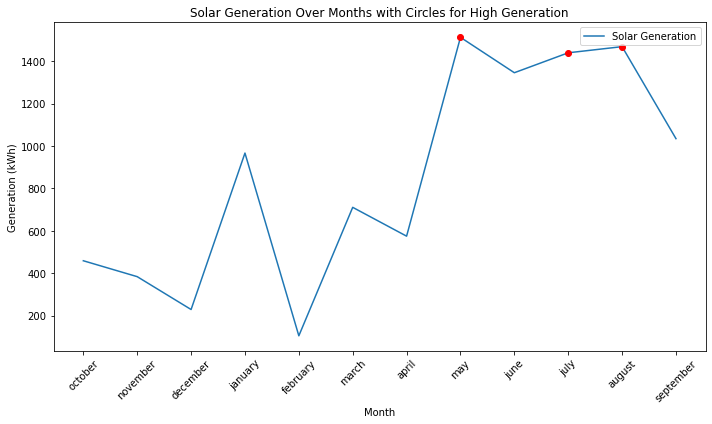

In [7]:
# Plotting generation of solar panels
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='generation', label='Solar Generation')

# Identifying months with high generation
high_generation_months = df[df['generation'] > df['generation'].quantile(0.75)]

# Annotating points with circles for high generation months
for month, generation in zip(high_generation_months['month'], high_generation_months['generation']):
    plt.scatter(month, generation, color='red', zorder=5)  # zorder ensures the circle is above the line

plt.xlabel('Month')
plt.ylabel('Generation (kWh)')
plt.title('Solar Generation Over Months with Circles for High Generation')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# Define the initial investment and monthly profits
initial_investment = 200000  

cumulative_profits = [sum(df['profit-generation'][:i + 1]) for i in range(len(df['profit-generation']))]
total = df['profit-generation'].sum()

print(total)
print(cumulative_profits)
period = initial_investment/total
print(period)
year = int(period)*total
print(year)


31872.27
[1331.1, 3162.7799999999997, 4367.32, 8254.66, 8613.76, 11045.380000000001, 12885.380000000001, 17409.25, 21433.79, 25436.99, 29212.32, 31872.27]
6.275047243261932
191233.62


In [9]:
first_exceedance = None

# Loop through each month and accumulate the results
current_value = year
for month, value in enumerate(df['profit-generation'], start=1):
    current_value += value
    if current_value > initial_investment and first_exceedance is None:
        first_exceedance = (month, current_value)

# Display the results and the first exceedance, if found
print("Results:Profit generation at the end of the PayBack Year", current_value)

if first_exceedance is not None:
    print("First exceedance in month {} with value {}".format(*first_exceedance))


Results:Profit generation at the end of the PayBack Year 223105.89
First exceedance in month 6 with value 202279.0


In [10]:

print("The payback period is " + str(int(period)) + " years of the " + str(first_exceedance[0]) + "th month with the value " + str(first_exceedance[1]))



The payback period is 6 years of the 6th month with the value 202279.0
